# **Classification**

https://www.timeseriesclassification.com/description.php?Dataset=FordB

In [33]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from aeon.classification.convolution_based import MultiRocketClassifier

## **Dataset optimization**

In [34]:
df_train = pd.read_csv('data/FordB_TRAIN.txt', sep='  ', header=None, engine='python')
df_train.rename(columns={0: 'label'}, inplace=True)
for col in df_train.columns:
    df_train[col] = df_train[col].astype(np.float32)

train_memory = df_train.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Memory usage of training data: {train_memory:.2f} MB")

df_test = pd.read_csv('data/FordB_TEST.txt', sep='  ', header=None, engine='python')
df_test.rename(columns={0: 'label'}, inplace=True)
for col in df_test.columns:
    df_test[col] = df_test[col].astype(np.float32)

test_memory = df_test.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Memory usage of test data: {test_memory:.2f} MB")

Memory usage of training data: 6.95 MB
Memory usage of test data: 1.55 MB


In [35]:
X_train = np.array(df_train.drop('label', axis=1))
y_train = np.array(df_train['label'])

X_test = np.array(df_test.drop('label', axis=1))
y_test = np.array(df_test['label'])

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

## **Model training**

In [36]:
multi_rocket = MultiRocketClassifier(n_kernels=3000, n_features_per_kernel=8, max_dilations_per_kernel=32, n_jobs=-1)
start_time = time.time()
multi_rocket.fit(X_train, y_train)
minutos, segundos = divmod(time.time() - start_time, 60)
print(f"***** MultiRocketClassifier training time: {int(minutos)} minutes {int(segundos)} seconds *****")

multi_rocket_train_preds = multi_rocket.predict(X_train)
train_accuracy = metrics.accuracy_score(y_true=y_train, y_pred=multi_rocket_train_preds)
print(f"Train accuracy:", train_accuracy)
multi_rocket_test_preds = multi_rocket.predict(X_test)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=multi_rocket_test_preds)
print(f"Test accuracy:", test_accuracy)

***** MultiRocketClassifier training time: 0 minutes 12 seconds *****
Train accuracy: 1.0
Test accuracy: 0.8246913580246914


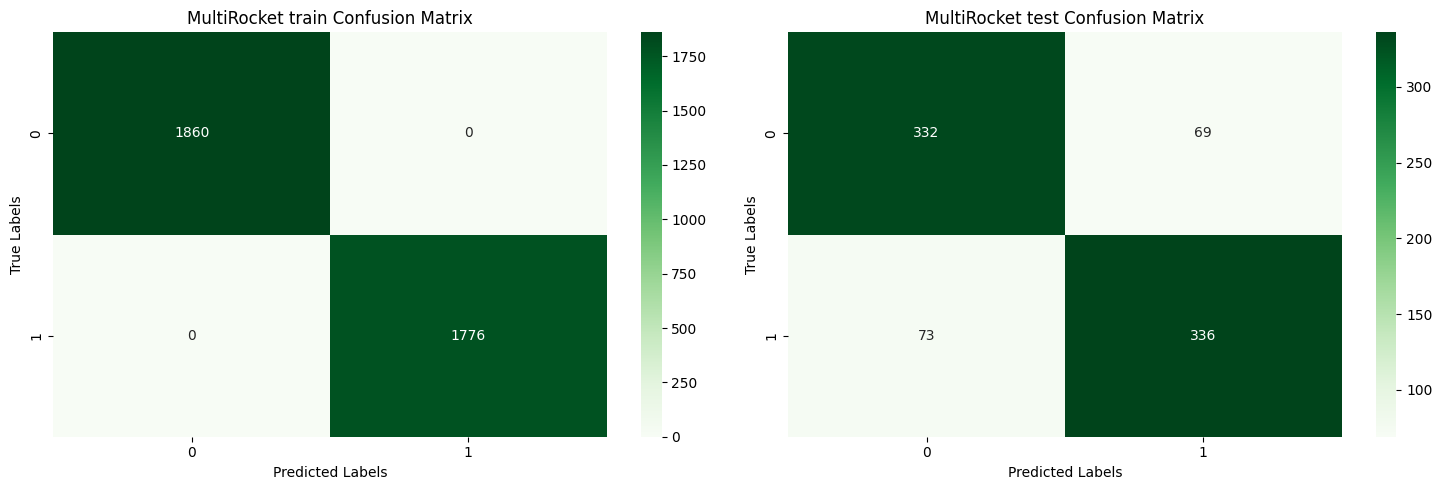

In [52]:
cm_train = metrics.confusion_matrix(y_train, multi_rocket_train_preds)
cm_test = metrics.confusion_matrix(y_test, multi_rocket_test_preds)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
plt.title('MultiRocket train Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('MultiRocket test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()